In [4]:
import scanpy as sc
import anndata
import numpy as np

# List of paths to the directories containing 10x Genomics formatted data
directory_paths = [
     '/Users/randyramdial/Desktop/FoMR/Caron 2020/434',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/435',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/436',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/437',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/438',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/439',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/440',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/441',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/442',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/443',
    '/Users/randyramdial/Desktop/FoMR/Caron 2020/444',
]

# Initialize a list to store the AnnData objects
adata_list = []

# Loop through each directory path and read the data
for path in directory_paths:
    adata = sc.read_10x_mtx(path)
    
    # Add a new categorical annotation 'batch' to each AnnData object
    batch_key = path.split('/')[-1]  # Extract batch information from the path
    adata.obs['batch'] = np.repeat(batch_key, adata.shape[0])
    
    adata_list.append(adata)

# Concatenate the list of AnnData objects
concatenated_adata = anndata.concat(adata_list, index_unique=None)

# Add var attributes 'gene_ids' and 'feature_types' from the first adata in the list
concatenated_adata.var['gene_ids'] = adata_list[0].var['gene_ids']
concatenated_adata.var['feature_types'] = adata_list[0].var['feature_types']

concatenated_adata

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 39375 × 33694
    obs: 'batch'
    var: 'gene_ids', 'feature_types'

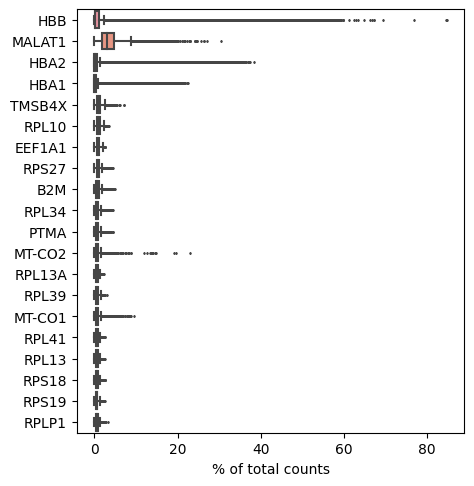

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
sc.pl.highest_expr_genes(concatenated_adata, n_top=20, )
sc.pp.filter_cells(concatenated_adata, min_genes=200)
sc.pp.filter_genes(concatenated_adata, min_cells=3)
concatenated_adata.var['mt'] = concatenated_adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(concatenated_adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [6]:
adata = concatenated_adata
adata

AnnData object with n_obs × n_vars = 39355 × 23198
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

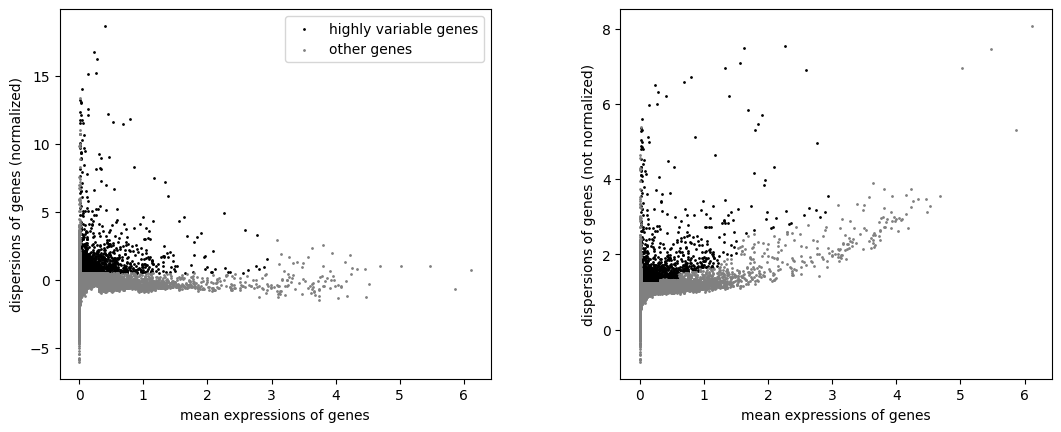

In [7]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
sc.pl.highly_variable_genes(adata)

In [9]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Assuming 'adata' is loaded with your dataset
sc.tl.leiden(adata)

sc.tl.umap(adata)

/Users/randyramdial/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


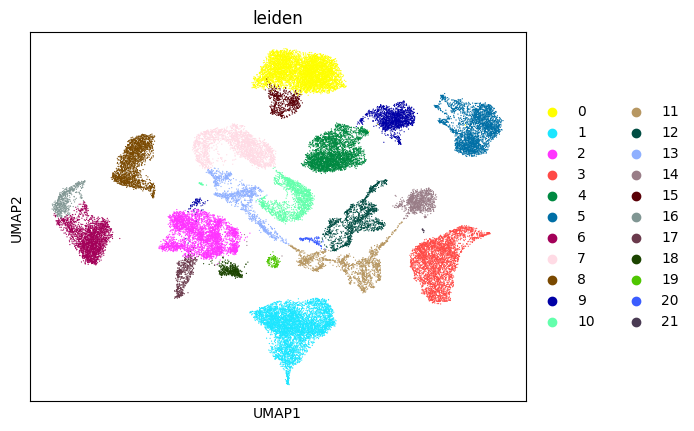

In [17]:
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color=['leiden'])